# Introduction

Given a CSV file of 6 countries and their economic output by year, we will investigate if there is a correlation between GDP and life expectancy. 

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Which countries have the longest life expectancy?
+ Has life expectancy been increasing over time? What about for each country?
+ Has GDP been increasing over time?
+ Is there a positive correlation between GDP and life expectancy for a country?

# Import Modules

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

## Load and Inspect the Data

In [2]:
gdp_data = pd.read_csv('all_data.csv')
gdp_data.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [3]:
gdp_data.shape

(96, 4)

We have 4 variables with 96 observations in this dataset.

## Explore the Data

How many unique countries and years are represented in the data?

In [4]:
print(gdp_data.Country.unique())
print(gdp_data.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


There are 6 unique countries and the years between 2000 and 2015 in this dataset.

#### Cleaning Column Name
There is an inconsistency with the third column name. This column name is 5 words where the other column names are just 1 word. We will change the formatting of this column name to be more consistent and for ease of use for coding.

In [5]:
gdp_data = gdp_data.rename({'Life expectancy at birth (years)': 'LEABY'}, axis = 'columns' )
print(gdp_data.columns)

Index(['Country', 'Year', 'LEABY', 'GDP'], dtype='object')


### Exploratory Plots

We will begin by breaking the data up by country so that we can create summary statistics.

In [6]:
gdp_means = gdp_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
gdp_means

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


At a glance it is easy to tell that life expectancy is drastically shorter than the other countries, but it is difficult to tell how different GDP is from country to country due to the use of scientific notation. A bar chart will prove to be useful at visually understanding this data.

#### Bar Charts

Text(0.5, 0, 'Life Expectancy at Birth (years)')

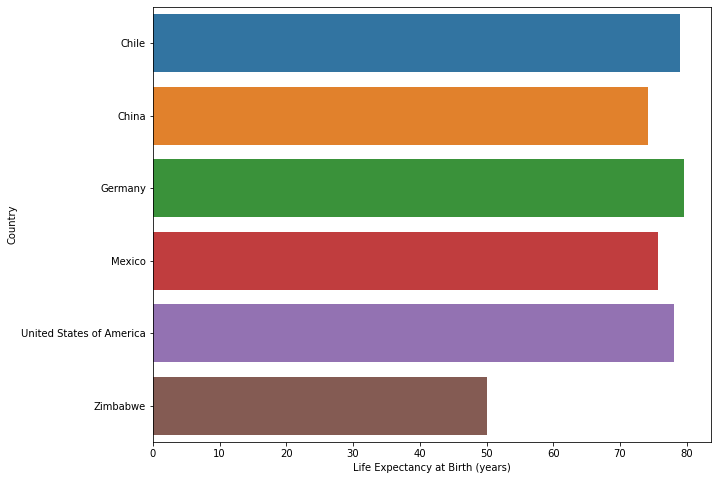

In [7]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'LEABY', y = 'Country', data = gdp_means)
plt.xlabel('Life Expectancy at Birth (years)')

Text(0.5, 0, 'Gross Domestic Product in trillions of USD')

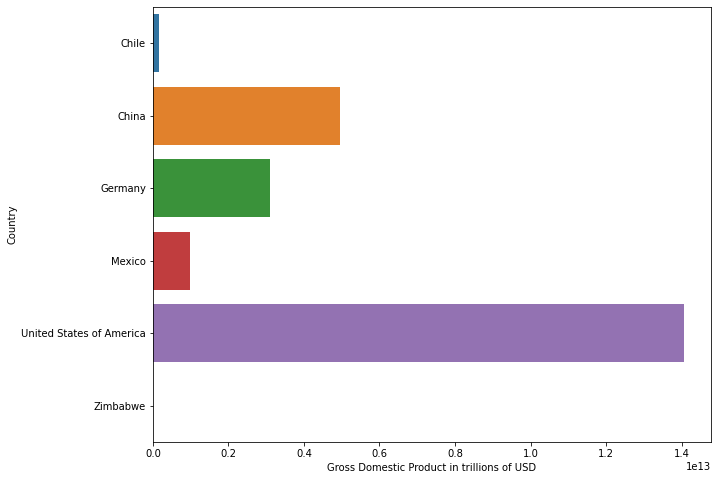

In [8]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'GDP', y = 'Country', data = gdp_means)
plt.xlabel('Gross Domestic Product in trillions of USD')

After plotting some barcharts, we can see that Zimbabwe's life expectancy is quite short compared to the other 5 countries who all are in the 75 - 80 year range. It is also much easier to tell that the United States has the largest GDP by a large margin. China and Germany also have large GDPs but the other 3 countries are small in comparison to the US.

#### Violin Plots

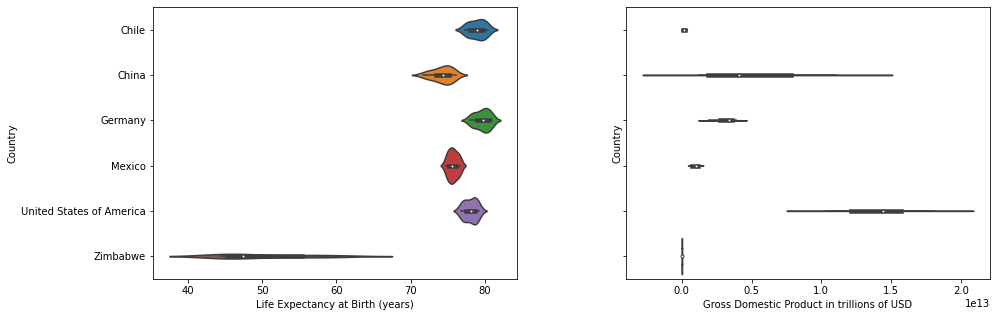

In [9]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
plt.subplot(1,2,1)
sns.violinplot(data = gdp_data, x = 'LEABY', y = 'Country')
plt.xlabel('Life Expectancy at Birth (years)')
plt.subplot(1,2,2)
sns.violinplot(data = gdp_data, x = 'GDP', y = 'Country')
plt.xlabel('Gross Domestic Product in trillions of USD')
plt.subplots_adjust(wspace =.3)

We can see that the distribution of life expectancy if fairly tight for Chile, China, Germany, Mexico, and USA. For Zimbabwe there is a lot of variation. This could imply that there has been some drastic change over the years. For GDP, the distributions for USA and China are wide and narrow for the other countries. USA and China's GDP could have also changed dramatically over the past few years. Let's create some line charts to get a better idea of what direction the data is trending towards. 

#### Line Charts

Text(0, 0.5, 'Life Expectancy at Birth (years)')

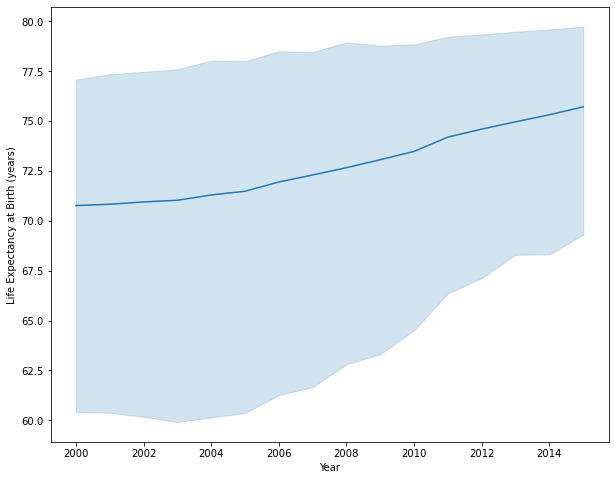

In [10]:
plt.figure(figsize = (10,8))
sns.lineplot(data = gdp_data, x = 'Year', y = 'LEABY')
plt.ylabel('Life Expectancy at Birth (years)')

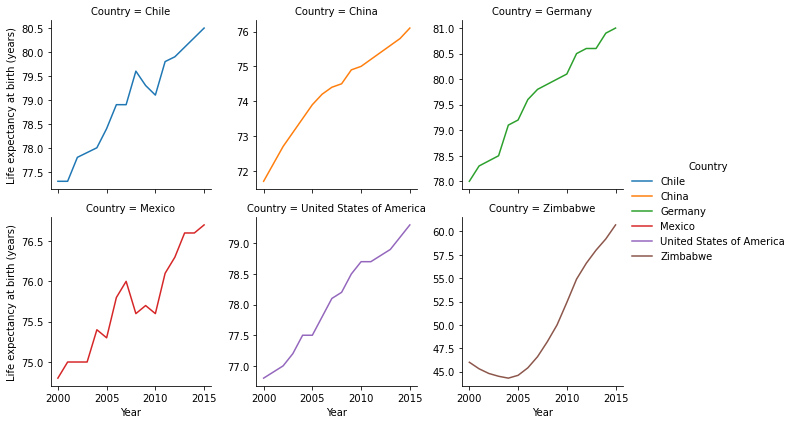

In [11]:
graphLEABY = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

Our first chart shows the aggregate trend for life expectancy for years 2000 - 2015. It shows that life expectancy has increased an average of 3 or so years over this 16 year period, but there is a lot of variation mostly due to Zimbabwe's inclusion. The second charts breaks up this data by country, and it clearly shows that this trend is also the case for each country. Most notably, Zimbabwe's life expectanct has increased 33% during this period.

Text(0, 0.5, 'Gross DOmestic Product in trillions of USD')

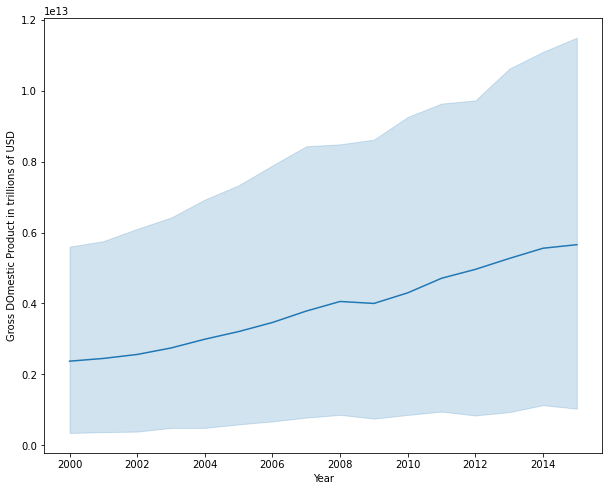

In [12]:
plt.figure(figsize = (10,8))
sns.lineplot(data = gdp_data, x = 'Year', y = 'GDP')
plt.ylabel('Gross DOmestic Product in trillions of USD')

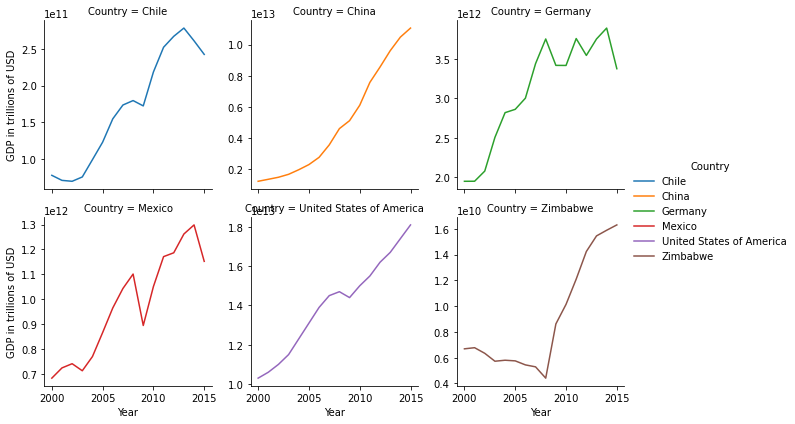

In [13]:
graphLEABY = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in trillions of USD"))

graphLEABY;

Like the life expectancy line charts the GDP line charts tell a similar story. Overall, GDP has been increasing over time for the group. Broken down, each country's GDP is significantly higher in 2015 than in 2000. 

#### Scatter Plots

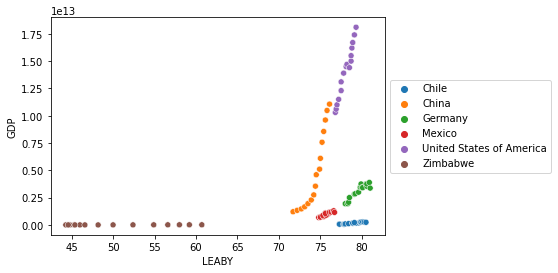

In [14]:
sns.scatterplot(data = gdp_data, x = 'LEABY', y = 'GDP', hue = 'Country')
plt.legend(loc = 'center left', bbox_to_anchor=(1,.5), ncol = 1)

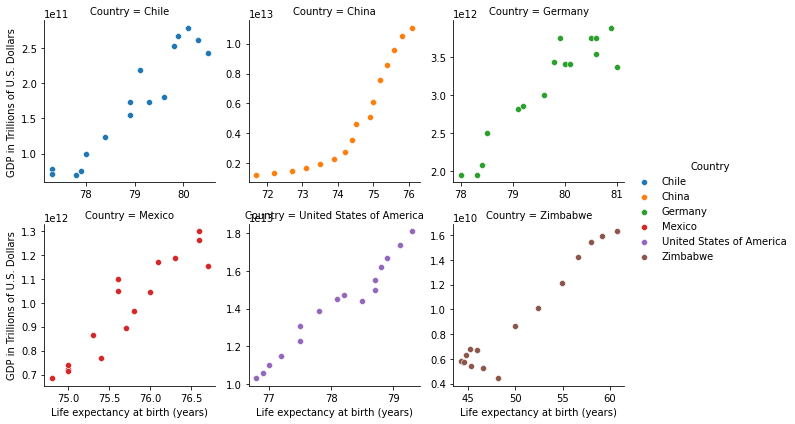

In [15]:
graph = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

In the first chat, the correlation looks familiar but when grouping the data into its respective countries, there is more cohesiveness within the chart. For example, Germany's datapoints tend stick together and that is the case for the other countries as well. When creating a seperate scatterplot for each country there seems to be a strong positive correlation between life expectancy and GDP. We can further quantify this with a pearson r correlation.

#### Summary Statistics

In [16]:
corr, p = pearsonr(gdp_data.LEABY, gdp_data.GDP)
print('The correlation coeffiecient for life expectancy and GDP in the dataset is '+ str(corr))

The correlation coeffiecient for life expectancy and GDP in the dataset is 0.34320674844915605


In [17]:
for country in gdp_data.Country.unique():
    corr, p = pearsonr(gdp_data.LEABY[gdp_data.Country == country],gdp_data.GDP[gdp_data.Country == country])
    print('The correlation coeffiecient for life expectancy and GDP in {} is '.format(country) + str(corr))

The correlation coeffiecient for life expectancy and GDP in Chile is 0.9498766659254413
The correlation coeffiecient for life expectancy and GDP in China is 0.9085255408648356
The correlation coeffiecient for life expectancy and GDP in Germany is 0.932698898256127
The correlation coeffiecient for life expectancy and GDP in Mexico is 0.932237716784708
The correlation coeffiecient for life expectancy and GDP in United States of America is 0.9817092382430257
The correlation coeffiecient for life expectancy and GDP in Zimbabwe is 0.9661998955858779


While looking at the data as whole it does not look like GDP and Life expectancy are strongly correlated with a coeffiecient of only .34. But after grouping the data into each country then calculating the correlation coeffiecient, we can see that GDP and life expectancy are actually very strongly correlated with each other with the smallest coefficient in the group being .91. With that being said, a large GDP doesn't necessarily mean a long life expectancy but rather a large GDP relative to previous years withing a country does correlate with a longer life expectancy. 

## Conclusions

Even with a small dataset of less than 100 rows, we were able to create a number of visualizations as well as answer our questions from the beginning of the project. 

+ Which countries have the longest life expectancy?
    + Within the last 15 years Germany has the longest life expectancy at 79.66 years.
+ Has life expectancy been increasing over time? What about for each country?
    + Yes life expectancy has been incrasing over time in each of the 6 countries.
+ Has GDP been increasing over time?
    + Yes GDP has been increasing over time in each of the 6 countries.
+ Is there a positive correlation between GDP and life expectancy for a country?
    + Yes there is a very strong positive correlation between GDP and life exepctancy for each country.
   